In [233]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [234]:
df = pd.read_csv(r'c:/users/91991/downloads/ZOMATO PROJECT.csv',encoding='latin-1')

In [235]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [236]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [237]:
df1=pd.read_csv(r'c:/users/91991/desktop/Country-Code.csv')

In [238]:
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [239]:
df_merge=pd.merge(df,df1,on='Country Code',how='left')

# DataFrame df_merge will contain all the columns from both DataFrames, with matching rows joined together and non-matching rows filled with NaN values for the columns from df1.

In [240]:
df_merge

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [241]:
df_merge.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [242]:
df_merge.shape

(9551, 22)

In [243]:
df_merge.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [244]:
df_merge.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [245]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [246]:
df_merge.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

THERE ARE NO NULL VALUES IN THE DATA

In [247]:
df_merge.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


WE CAN DROP CERTAIN COLUMNS AS THEY ARE NOT HELPING IN OUR DATA VISUALISATION

In [248]:
df_merge.drop(['Restaurant ID','Country Code','Address','Locality','Locality Verbose','Restaurant Name','Country'],axis=1,inplace=True)

In [249]:
df_merge.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


 WE CAN EVEN DROP LONGITUDE,LATITUDE,CURRENCY ,RATING COLOR    

In [250]:
df_merge.drop(['Longitude','Latitude','Currency','Rating color'],axis=1,inplace=True)

In [251]:
df_merge.head()

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,Makati City,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Excellent,314
1,Makati City,Japanese,1200,Yes,No,No,No,3,4.5,Excellent,591
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Very Good,270
3,Mandaluyong City,"Japanese, Sushi",1500,No,No,No,No,4,4.9,Excellent,365
4,Mandaluyong City,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,Excellent,229


In [252]:
df_merge.shape

(9551, 11)

In [253]:
df['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

# UNIVARIATE AND BIVARIATE ANALYSIS

In [254]:
df_merge['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

<Axes: xlabel='Average Cost for two', ylabel='count'>

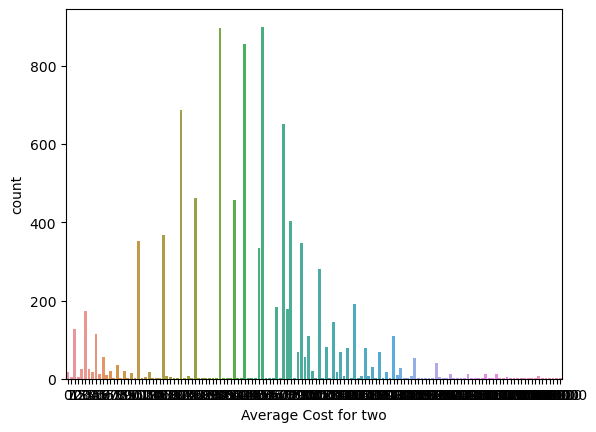

In [255]:
sns.countplot(x='Average Cost for two',data=df_merge)

THE HIGHEST AVERAGE COST FOR TWO IS 900

In [256]:
df_merge['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

<Axes: xlabel='Price range', ylabel='count'>

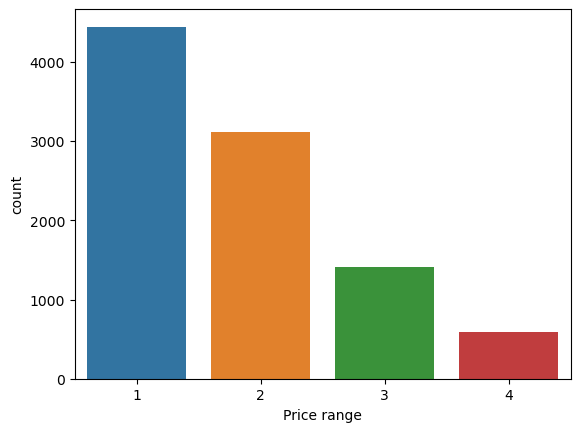

In [257]:
sns.countplot(x='Price range',data=df_merge)

HIGHEST PRICE RANGE=4444, LOWEST PRICE RANGE=586

<Axes: xlabel='Has Table booking', ylabel='count'>

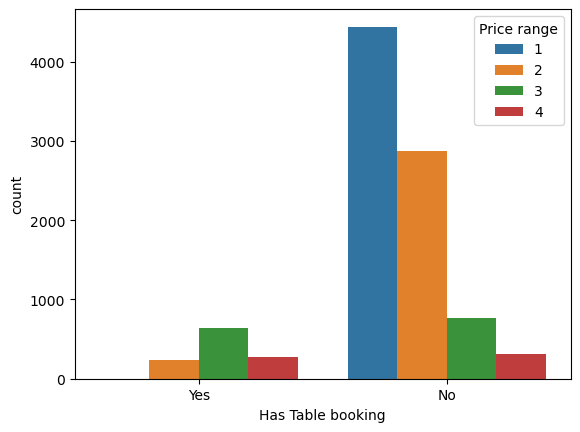

In [258]:
sns.countplot(x='Has Table booking',hue='Price range',data=df_merge)

price range is higher in case of persons with no table booking

<Axes: xlabel='Has Online delivery', ylabel='count'>

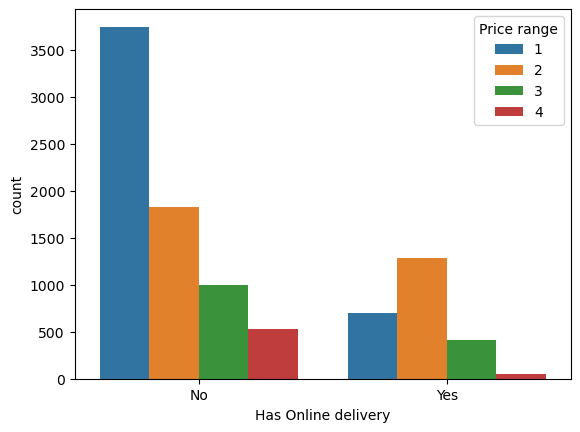

In [259]:
sns.countplot(x='Has Online delivery',hue='Price range',data=df_merge)

<Axes: xlabel='Aggregate rating', ylabel='count'>

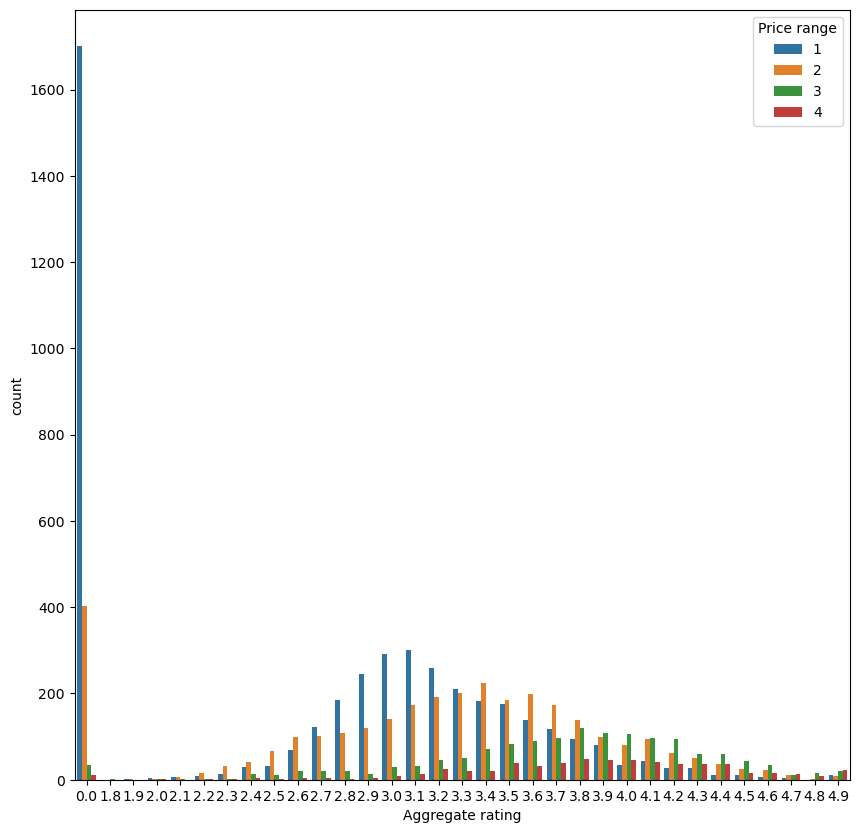

In [260]:
plt.figure(figsize=(10,10))
sns.countplot(x='Aggregate rating',hue='Price range',data=df_merge)

PRICE RANGE HAS VERY LESS EFFECT ON AGGREGATE RATING

In [261]:
df_merge.corr()

,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


<Axes: >

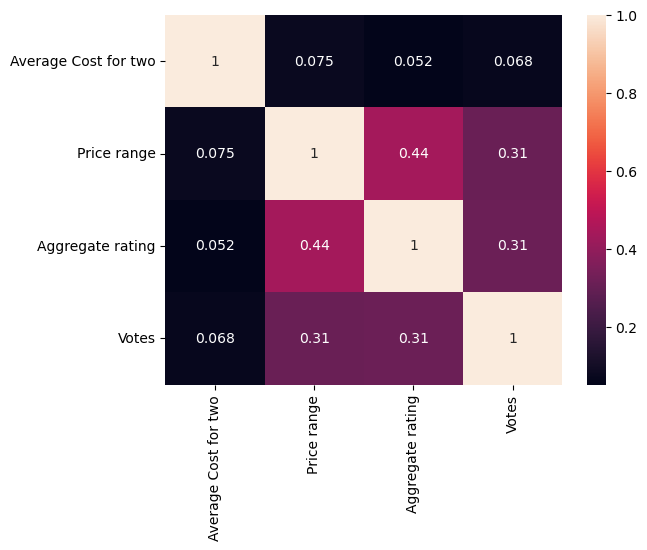

In [269]:
sns.heatmap(df_merge.corr(),annot=True)

In [270]:
df_merge.shape

(9551, 10)

In [272]:
df_merge.head()

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,Makati City,"French, Japanese, Desserts",1100,Yes,No,No,3,4.8,Excellent,314
1,Makati City,Japanese,1200,Yes,No,No,3,4.5,Excellent,591
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4,4.4,Very Good,270
3,Mandaluyong City,"Japanese, Sushi",1500,No,No,No,4,4.9,Excellent,365
4,Mandaluyong City,"Japanese, Korean",1500,Yes,No,No,4,4.8,Excellent,229


In [271]:
df_merge.dtypes

City                     object
Cuisines                 object
Average Cost for two      int64
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating text              object
Votes                     int64
dtype: object

In [273]:
from sklearn.preprocessing import LabelEncoder

In [274]:
le=LabelEncoder()
df_merge['City']=le.fit_transform(df_merge['City'])
df_merge['Cuisines']=le.fit_transform(df_merge['Cuisines'])
df_merge['Has Table booking']=le.fit_transform(df_merge['Has Table booking'])
df_merge['Has Online delivery']=le.fit_transform(df_merge['Has Online delivery'])
df_merge['Is delivering now']=le.fit_transform(df_merge['Is delivering now'])

df_merge['Rating text']=le.fit_transform(df_merge['Rating text'])


In [275]:
df_merge.head()

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,73,920,1100,1,0,0,3,4.8,1,314
1,73,1111,1200,1,0,0,3,4.5,1,591
2,75,1671,4000,1,0,0,4,4.4,5,270
3,75,1126,1500,0,0,0,4,4.9,1,365
4,75,1122,1500,1,0,0,4,4.8,1,229


# PLOTTING OUTLIERS

City                       Axes(0.125,0.653529;0.110714x0.226471)
Cuisines                Axes(0.257857,0.653529;0.110714x0.226471)
Average Cost for two    Axes(0.390714,0.653529;0.110714x0.226471)
Has Table booking       Axes(0.523571,0.653529;0.110714x0.226471)
Has Online delivery     Axes(0.656429,0.653529;0.110714x0.226471)
Is delivering now       Axes(0.789286,0.653529;0.110714x0.226471)
Price range                Axes(0.125,0.381765;0.110714x0.226471)
Aggregate rating        Axes(0.257857,0.381765;0.110714x0.226471)
Rating text             Axes(0.390714,0.381765;0.110714x0.226471)
Votes                   Axes(0.523571,0.381765;0.110714x0.226471)
dtype: object

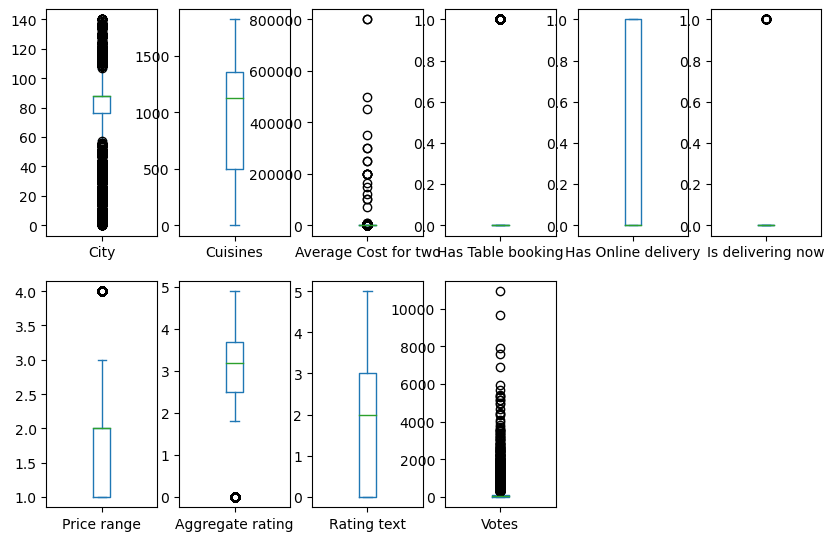

In [276]:
df_merge.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,10))

# REMOVING OUTLIERS

In [307]:
z=np.abs(zscore(df_merge))
z

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,0.228533,0.135907,0.006154,2.692181,0.587547,0.059771,1.319803,1.407131,0.465442,0.365202
1,0.228533,0.235186,0.000049,2.692181,0.587547,0.059771,1.319803,1.209281,0.465442,1.009168
2,0.142317,1.323205,0.173743,2.692181,0.587547,0.059771,2.424090,1.143331,1.895070,0.262911
3,0.142317,0.264329,0.018659,0.371446,0.587547,0.059771,2.424090,1.473081,0.465442,0.483766
4,0.142317,0.256557,0.018659,2.692181,0.587547,0.059771,2.424090,1.407131,0.465442,0.167595
...,...,...,...,...,...,...,...,...,...,...
9546,2.659685,1.599096,0.069428,0.371446,0.587547,0.059771,1.319803,0.945480,1.895070,1.467151
9547,2.659685,1.620468,0.067878,0.371446,0.587547,0.059771,1.319803,1.011430,1.895070,2.039049
9548,2.659685,0.233243,0.063845,0.371446,0.587547,0.059771,2.424090,0.681680,0.124686,1.171903
9549,2.659685,1.296005,0.066947,0.371446,0.587547,0.059771,2.424090,0.879530,1.895070,1.729853


In [308]:
threshold=3
print(np.where(z>3))

(array([  82,   83,   84,   85,   86,   87,   88,   89,   90,   91,   92,
         93,   94,   95,   96,   97,   98,   99,  100,  101,  102,  103,
        103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,
        114,  115,  116,  117,  118,  119,  120,  121,  122,  355,  360,
        361,  362,  369,  374,  432,  452,  497,  501,  511,  512,  513,
        515,  564,  565,  566,  567,  568,  569,  570,  571,  572,  573,
        574,  575,  576,  577,  578,  579,  580,  581,  582,  583,  585,
        591,  600,  624,  625,  626,  627,  628,  629,  630,  631,  632,
        633,  634,  635,  636,  637,  638,  639,  640,  641,  642,  643,
        644,  644,  645,  646,  647,  648,  649,  650,  651,  652,  653,
        654,  655,  656,  657,  658,  659,  660,  661,  662,  663,  664,
        665,  666,  667,  668,  669,  670,  671,  672,  673,  674,  675,
        676,  677,  678,  679,  680,  681,  682,  683,  684,  685,  686,
        687,  688,  689,  690,  691,  692,  693,  

In [310]:
df_new=df_merge[(z<3).all(axis=1)]
df_new


,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,73,920,1100,1,0,0,3,4.8,1,314
1,73,1111,1200,1,0,0,3,4.5,1,591
2,75,1671,4000,1,0,0,4,4.4,5,270
3,75,1126,1500,0,0,0,4,4.9,1,365
4,75,1122,1500,1,0,0,4,4.8,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,140,1813,80,0,0,0,3,4.1,5,788
9547,140,1824,105,0,0,0,3,4.2,5,1034
9548,140,1110,170,0,0,0,4,3.7,2,661
9549,140,1657,120,0,0,0,4,4.0,5,901


In [281]:
df_new.shape

(9167, 10)

In [282]:
df_merge.shape

(9551, 10)

ALMOST 384 ROWS HAVE BEEN DELETED

# SPLITTING THE DATA INTO X AND Y BY TAKING AVERAGE COST FOR TWO AS A TARGET VARIABLE

In [280]:
x=df_new.drop(['Average Cost for two'],axis=1)
x

,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,73,920,1,0,0,3,4.8,1,314
1,73,1111,1,0,0,3,4.5,1,591
2,75,1671,1,0,0,4,4.4,5,270
3,75,1126,0,0,0,4,4.9,1,365
4,75,1122,1,0,0,4,4.8,1,229
...,...,...,...,...,...,...,...,...,...
9546,140,1813,0,0,0,3,4.1,5,788
9547,140,1824,0,0,0,3,4.2,5,1034
9548,140,1110,0,0,0,4,3.7,2,661
9549,140,1657,0,0,0,4,4.0,5,901


In [284]:
y=df_new['Average Cost for two']
y

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9167, dtype: int64

# STANDARD SCALER

In [285]:
from sklearn.preprocessing import StandardScaler

In [287]:
sc=StandardScaler()
X=sc.fit_transform(x)
X

array([[-0.32107891, -0.13349872,  2.72356651, ...,  1.44219081,
        -0.44625853,  0.9978263 ],
       [-0.32107891,  0.23755648,  2.72356651, ...,  1.24460454,
        -0.44625853,  2.3528215 ],
       [-0.22603773,  1.32546701,  2.72356651, ...,  1.17874245,
         1.95236473,  0.7825924 ],
       ...,
       [ 2.86280069,  0.23561378, -0.36716563, ...,  0.71770782,
         0.15339728,  2.69523906],
       [ 2.86280069,  1.29826925, -0.36716563, ...,  0.91529409,
         1.95236473,  3.86924212],
       [ 2.86280069, -1.27774748, -0.36716563, ...,  0.91529409,
         1.95236473,  2.3528215 ]])

# USING VARIOUS CLASSIFICATION MODELS FOR PREDICTING AVERAGE COST FOR TWO

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [336]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [337]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7333, 9), (1834, 9), (7333,), (1834,))

In [340]:
def classify(clf,X,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=(accuracy_score(y_test,pred))
    print("Accuracy Score:",acc_score)
    print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred))
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    cv_score=(cross_val_score(clf,X,y,cv=5).mean())
    print("Cross validation Score:",cv_score)
    
    result=acc_score-cv_score
    print("\nAccuracy Score-Cross Validation Score",result)
    

# LOGISTIC REGRESSION

In [341]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy Score: 1.0

Confusion Matrix:
 [[883   0   0   0]
 [  0 593   0   0]
 [  0   0 248   0]
 [  0   0   0 110]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       883
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00       248
           4       1.00      1.00      1.00       110

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834

Cross validation Score: 1.0

Accuracy Score-Cross Validation Score 0.0


# RANDOM FOREST CLASSIFIER

In [342]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy Score: 1.0

Confusion Matrix:
 [[883   0   0   0]
 [  0 593   0   0]
 [  0   0 248   0]
 [  0   0   0 110]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       883
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00       248
           4       1.00      1.00      1.00       110

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834

Cross validation Score: 1.0

Accuracy Score-Cross Validation Score 0.0


# DECISION TREE CLASSIFIER

In [344]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy Score: 1.0

Confusion Matrix:
 [[883   0   0   0]
 [  0 593   0   0]
 [  0   0 248   0]
 [  0   0   0 110]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       883
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00       248
           4       1.00      1.00      1.00       110

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834

Cross validation Score: 1.0

Accuracy Score-Cross Validation Score 0.0


# KNEIGHBORS CLASSIFIER

In [345]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy Score: 0.9738276990185387

Confusion Matrix:
 [[880   3   0   0]
 [  5 571  17   0]
 [  0   7 240   1]
 [  0   0  15  95]]

Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       883
           2       0.98      0.96      0.97       593
           3       0.88      0.97      0.92       248
           4       0.99      0.86      0.92       110

    accuracy                           0.97      1834
   macro avg       0.96      0.95      0.95      1834
weighted avg       0.98      0.97      0.97      1834

Cross validation Score: 0.888650816456566

Accuracy Score-Cross Validation Score 0.08517688256197276


# HYPERPARAMETER TRAINING USING RANDOM FOREST CLASSIFIER

In [346]:
from sklearn.model_selection import GridSearchCV
par={"n_estimators":range(100,500,100),"criterion":["gini","entropy"],"max_depth":range(0,10,5),"min_samples_split":range(2,5),
    "min_samples_leaf":range(1,5),"max_features":["auto"]}
grid=GridSearchCV(RandomForestClassifier(),param_grid=par,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10, 5), 'max_features': ['auto'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': range(100, 500, 100)},
             verbose=2)

In [347]:
print("Best Score:",grid.best_score_)
print("best Estimator:",grid.best_estimator_)
print("Best paramters:",grid.best_params_)
  

Best Score: 0.9998635743519781
best Estimator: RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=3,
                       min_samples_split=3)
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [348]:
rf_final = RandomForestClassifier(criterion='gini',
                                  max_depth=5,
                                  max_features='auto',
                                  min_samples_leaf=3,
                                  min_samples_split=3,
                                  n_estimators=100)
rf_final.fit(x_train,y_train)
predrf=rf_final.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification report:\n",classification_report(y_test,predrf))

Accuracy: 1.0
Confusion Matrix:
 [[883   0   0   0]
 [  0 593   0   0]
 [  0   0 248   0]
 [  0   0   0 110]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       883
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00       248
           4       1.00      1.00      1.00       110

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834



ACCURACY OF OUR MODEL TAKING AVERAGE COST FOR TWO IS 1. OUR MODEL IS THE BEST FIT

# USING VARIOUS CLASSIFICATION MODELS TAKING PRICE RANGE AS A TARGET VARIABLE

# SPLITTING X AND Y BY TAKING PRICE RANGE AS A TARGET VARIABLE

In [311]:
x=df_new.drop(['Price range'],axis=1)
x


,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes
0,73,920,1100,1,0,0,4.8,1,314
1,73,1111,1200,1,0,0,4.5,1,591
2,75,1671,4000,1,0,0,4.4,5,270
3,75,1126,1500,0,0,0,4.9,1,365
4,75,1122,1500,1,0,0,4.8,1,229
...,...,...,...,...,...,...,...,...,...
9546,140,1813,80,0,0,0,4.1,5,788
9547,140,1824,105,0,0,0,4.2,5,1034
9548,140,1110,170,0,0,0,3.7,2,661
9549,140,1657,120,0,0,0,4.0,5,901


In [312]:
y=df_new['Price range']
y

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9167, dtype: int64

In [313]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [314]:
x_train.shape

(7333, 9)

In [315]:
x_test.shape

(1834, 9)

In [316]:
y_train.shape

(7333,)

In [317]:
y_test.shape

(1834,)

In [318]:
def classify(clf,X,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=(accuracy_score(y_test,pred))
    print("Accuracy Score:",acc_score)
    print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred))
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    cv_score=(cross_val_score(clf,X,y,cv=5).mean())
    print("Cross validation Score:",cv_score)
    
    result=acc_score-cv_score
    print("\nAccuracy Score-Cross Validation Score",result)
    

# LOGISTIC REGRESSION

In [320]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.772082878953108

Confusion Matrix:
 [[794  85   4   0]
 [ 89 459  44   1]
 [ 27  83 122  16]
 [ 26  18  25  41]]

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.90      0.87       883
           2       0.71      0.77      0.74       593
           3       0.63      0.49      0.55       248
           4       0.71      0.37      0.49       110

    accuracy                           0.77      1834
   macro avg       0.72      0.63      0.66      1834
weighted avg       0.77      0.77      0.76      1834

Cross validation Score: 0.7168300650678432

Accuracy Score-Cross Validation Score 0.05525281388526482


# RANDOM FOREST CLASSIFIER

In [321]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.9585605234460196

Confusion Matrix:
 [[875   4   1   3]
 [  4 575  12   2]
 [  0  17 227   4]
 [  2   2  25  81]]

Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       883
           2       0.96      0.97      0.97       593
           3       0.86      0.92      0.88       248
           4       0.90      0.74      0.81       110

    accuracy                           0.96      1834
   macro avg       0.93      0.90      0.91      1834
weighted avg       0.96      0.96      0.96      1834

Cross validation Score: 0.8572392363199575

Accuracy Score-Cross Validation Score 0.10132128712606214


In [322]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.9721919302071974

Confusion Matrix:
 [[872   6   3   2]
 [  2 580   8   3]
 [  0   3 240   5]
 [  7   5   7  91]]

Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       883
           2       0.98      0.98      0.98       593
           3       0.93      0.97      0.95       248
           4       0.90      0.83      0.86       110

    accuracy                           0.97      1834
   macro avg       0.95      0.94      0.94      1834
weighted avg       0.97      0.97      0.97      1834

Cross validation Score: 0.8321560200397295

Accuracy Score-Cross Validation Score 0.14003591016746786


# KNEIGHBORS CLASSIFIER

In [323]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.9116684841875682

Confusion Matrix:
 [[860  17   4   2]
 [ 18 556  19   0]
 [ 14  28 200   6]
 [ 17  11  26  56]]

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.97      0.96       883
           2       0.91      0.94      0.92       593
           3       0.80      0.81      0.80       248
           4       0.88      0.51      0.64       110

    accuracy                           0.91      1834
   macro avg       0.88      0.81      0.83      1834
weighted avg       0.91      0.91      0.91      1834

Cross validation Score: 0.9029260004247822

Accuracy Score-Cross Validation Score 0.008742483762785969


# SVC

In [329]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.9007633587786259

Confusion Matrix:
 [[870  11   2   0]
 [ 38 539  16   0]
 [ 31  21 189   7]
 [ 32   6  18  54]]

Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.99      0.94       883
           2       0.93      0.91      0.92       593
           3       0.84      0.76      0.80       248
           4       0.89      0.49      0.63       110

    accuracy                           0.90      1834
   macro avg       0.89      0.79      0.82      1834
weighted avg       0.90      0.90      0.90      1834

Cross validation Score: 0.8962718511524749

Accuracy Score-Cross Validation Score 0.004491507626151026


In [330]:
from sklearn.model_selection import GridSearchCV
par={"n_estimators":range(100,500,100),"criterion":["gini","entropy"],"max_depth":range(0,10,5),"min_samples_split":range(2,5),
    "min_samples_leaf":range(1,5),"max_features":["auto"]}
grid=GridSearchCV(RandomForestClassifier(),param_grid=par,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10, 5), 'max_features': ['auto'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': range(100, 500, 100)},
             verbose=2)

In [331]:
print("Best Score:",grid.best_score_)
print("best Estimator:",grid.best_estimator_)
print("Best paramters:",grid.best_params_)
  

Best Score: 0.9454527108901518
best Estimator: RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=4, min_samples_split=3,
                       n_estimators=300)
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 300}


In [332]:
rf_final = RandomForestClassifier(criterion='entropy',
                                  max_depth=5,
                                  max_features='auto',
                                  min_samples_leaf=4,
                                  min_samples_split=3,
                                  n_estimators=300)
rf_final.fit(x_train,y_train)
predrf=rf_final.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification report:\n",classification_report(y_test,predrf))

Accuracy: 0.9416575790621592
Confusion Matrix:
 [[881   1   0   1]
 [ 19 567   7   0]
 [ 10  18 220   0]
 [ 21   3  27  59]]
Classification report:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97       883
           2       0.96      0.96      0.96       593
           3       0.87      0.89      0.88       248
           4       0.98      0.54      0.69       110

    accuracy                           0.94      1834
   macro avg       0.94      0.84      0.88      1834
weighted avg       0.94      0.94      0.94      1834



ACCURACY SCORE IS.94 SO OUR MODEL IS WORKING WELL

# OBSERVATIONS

THE HIGHEST AVERAGE COST OF 2 IS 900

HIGHEST PRICE RANGE=4444, LOWEST PRICE RANGE=586

PRICING HAVE A VERY LITTLE EFFECT ON RATING

Price range is higher in case of persons with no table booking

PRICE PAID  IS HIGHER IN CASE OF NO ONLINE DELIVERY